## Подготовка ноутбука
Импортируем все необходимые библиотеки, настроим флаги и константы, которыми будем пользоваться в эксперименте, и определим служебные функции, чтобы не отвлекаться на них в расчетной части эксперимента.

In [2]:
# Если что-то меняется в коде, мы хотим это сразу видеть здесь
%load_ext autoreload
%autoreload 2

In [3]:
import os

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

from tabulate import tabulate
from tqdm.notebook import tqdm

from itertools import product
from collections import namedtuple
from copy import deepcopy
import time
import numpy as np
import pandas as pd

# Подключаем локальные пакеты
import pyons
from pyons.models.rfid import pyradise
from pyons.models.rfid.serialization import Input

In [4]:
# Настраиваем matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

Определим переменные окружения, которые будут использоваться в эксперименте.

In [5]:
# Нужно ли пересчитывать все, или можно использовать результаты из файлов
FORCE_SIMULATION = False
SIM_FILE_PATH = 'rfid_sim_data.csv'

# Зададим число машин, проезд которых по сети мы будем моделировать.
# Чем выше это число, тем точнее результаты, но на их получение нужно больше времени.
NUM_PACKETS = 10

# Цветовая схема для графиков
CMAP_NAME = 'viridis'

In [6]:
def get_color(x):
    """
    Получить цвет из текущей карты.
    """
    return cm.get_cmap(CMAP_NAME)(x)

## Создание датасета

In [7]:
BASE_INPUT = Input(tari="12.5", m="4", trext=False, q=4, reader_tx_power="31.5", vehicle_speed=60)
SPEED = [30, 60, 90, 120]

def make_input(**kwargs) -> Input:
    inp = deepcopy(BASE_INPUT)
    for key, value in kwargs.items():
        if key not in Input.__dataclass_fields__:
            raise KeyError(f'Input does not have key "{key}"')
        setattr(inp, key, value)
    return inp

In [8]:
if FORCE_SIMULATION or not os.path.exists(SIM_FILE_PATH):
    inputs = []
    inputs.extend([make_input(tari=tari, vehicle_speed=speed) for tari, speed in product(["6.25", "12.5", "18.75", "25"], SPEED)])
    inputs.extend([make_input(m=m, vehicle_speed=speed) for m, speed in product([1, 2, 4, 8], SPEED)])
    
    df = pd.DataFrame(inputs)
    df.to_csv(SIM_FILE_PATH, index=False, )
else:
    df = pd.read_csv(SIM_FILE_PATH)

In [15]:
df

,simulation_id,max_vehicles_num,vehicle_interval_min,vehicle_interval_max,vehicle_position_update_interval,vehicle_life_time,num_lanes,lane_width,vehicle_speed,vehicle_length,...,vehicle_read_rate,epc_read_rate,tid_read_rate,avg_antenna_interval,avg_rounds_per_tag,avg_round_duration,avg_num_vehicles_in_round,avg_num_tags_in_round,avg_num_tags_in_busy_round,elapsed_time
0,0,100,0.4,0.6,0.001,NaN,2,3.5,30,4.0,...,0.900990,0.836634,0.712871,0.004695,19.861386,0.004695,40.799154,0.768787,1.156069,504.236445
1,0,100,0.4,0.6,0.001,NaN,2,3.5,60,4.0,...,0.920792,0.905941,0.772277,0.003538,14.440594,0.003538,47.124520,0.429394,1.000000,484.471519
2,0,100,0.4,0.6,0.001,NaN,2,3.5,90,4.0,...,0.881188,0.881188,0.623762,0.003079,12.039604,0.003079,48.123079,0.307634,1.000000,516.598110
3,0,100,0.4,0.6,0.001,NaN,2,3.5,120,4.0,...,0.772277,0.866337,0.514851,0.002696,8.698020,0.002696,49.117892,0.197123,1.000000,521.544730
4,0,100,0.4,0.6,0.001,NaN,2,3.5,30,4.0,...,0.881188,0.836634,0.737624,0.010280,8.514851,0.010280,38.205656,0.730934,1.169294,408.277094
5,0,100,0.4,0.6,0.001,NaN,2,3.5,60,4.0,...,0.910891,0.896040,0.787129,0.007202,6.504950,0.007202,46.102919,0.393018,1.000000,408.460588
6,0,100,0.4,0.6,0.001,NaN,2,3.5,90,4.0,...,0.940594,0.871287,0.712871,0.006315,5.663366,0.006315,47.654157,0.295283,1.000000,402.368285
7,0,100,0.4,0.6,0.001,NaN,2,3.5,120,4.0,...,0.772277,0.787129,0.500000,0.005466,4.490099,0.005466,48.141020,0.203520,1.000000,426.708972
8,0,100,0.4,0.6,0.001,NaN,2,3.5,30,4.0,...,0.891089,0.846535,0.787129,0.016010,5.470297,0.016010,36.970395,0.718421,1.169165,358.646441
9,0,100,0.4,0.6,0.001,NaN,2,3.5,60,4.0,...,0.920792,0.871287,0.772277,0.011562,4.282178,0.011562,46.630549,0.409069,1.000000,371.403476


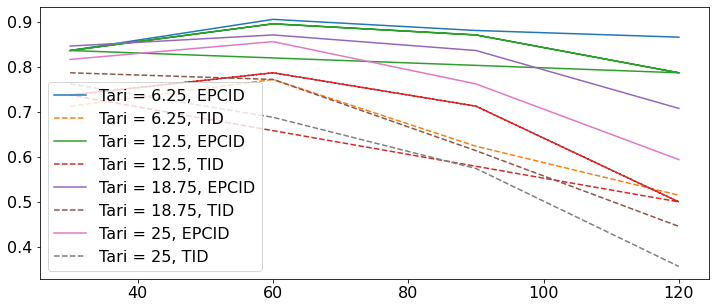

In [25]:
fig, ax = plt.subplots(figsize=(12, 5), nrows=1, ncols=1)
for tari in [6.25, 12.5, 18.75, 25]:
    df1 = df[(df.tari == tari) & (df.m == 4)]
    speed = df1.vehicle_speed
    epc_read_rate = df1.epc_read_rate
    tid_read_rate = df1.tid_read_rate
    ax.plot(speed, epc_read_rate, linestyle='-', label=f"Tari = {tari}, EPCID")
    ax.plot(speed, tid_read_rate, linestyle='--', label=f"Tari = {tari}, TID")
ax.legend()

In [1]:
df = pd.read_csv(SIM_FILE_PATH)

NameError: name 'pd' is not defined